# FINAL EXAMINATION 
- Các bạn có thời gian làm bài là 2.5h (Từ 9h35 - 12h00)
- Chỉ được sử dụng tài liệu có sẵn và không được sử dụng những tài liệu tham khảo là AI(ChatGPT, Gemini,...)
- Cố gắng làm hết khả năng của mình nha :)

## Câu 1: 3 Điểm

Tạo một tập dữ liệu với các ví dụ $\mathbf{x}^{i} \in \mathbb{R}^2$ and $y^{i} \in \{ 0, 1 \}$.

Lớp 0 nên đến từ một phân phối Gaussian 2D với trung bình $\begin{bmatrix} 10 \\ 5 \end{bmatrix}$ và hiệp phương sai  $\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$.

Lớp 1 nên đến từ một phân phối Gaussian 2D với trung bình  $\begin{bmatrix} 5 \\ 10 \end{bmatrix}$ và hiệp phương sai  $\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$.

In [643]:
#Khởi tạo data
import numpy as np
X0 = np.random.multivariate_normal([10, 5], [[2, 0], [0, 2]], 100)
X1 = np.random.multivariate_normal([5, 10], [[2, 0], [0, 2]], 100)
X = np.concatenate((X0, X1), 0)
y = np.concatenate((np.zeros((100)), np.ones((100))))

Chia tập dữ liệu với tập train (80%) và test (20%).

In [644]:
index = np.random.permutation(200) #code Here     random.permutation ----200
train_index = index[:int(200*0.8)]#code here
val_index = index[int(200*0.8):] #code here
X_train = X[train_index] #code here
X_val = X[val_index] #code here
y_train = y[train_index] #code here
y_val = y[val_index] #code here

In [645]:
set(y_train)

{0.0, 1.0}

Hiển thị biểu đồ phân tán với lớp 0 và lớp 1 được hiển thị bằng các màu khác nhau

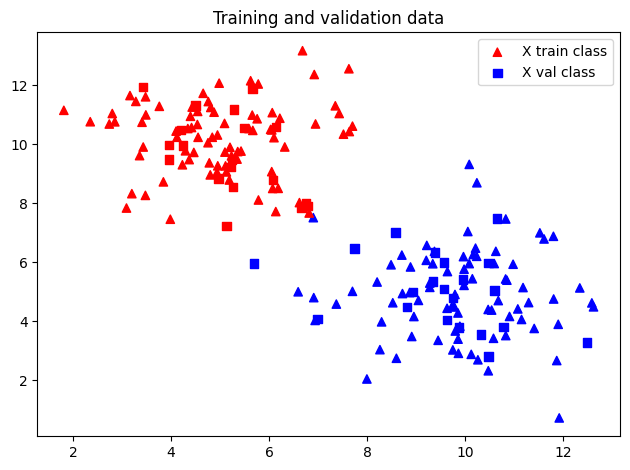

In [646]:
#code here
import matplotlib.pyplot as plt

color= ['red' if a == 1. else 'blue' for a in y_train]

plt.scatter(X_train[:, 0], X_train[:, 1], c =color, marker="^", label='X train class')

color= ['red' if a == 1. else 'blue' for a in y_val]
plt.scatter(X_val[:, 0], X_val[:, 1], c =color, marker ="s", label='X val class')

plt.title("Training and validation data")
plt.legend()
plt.show()


Kết quả sẽ ra thế này:

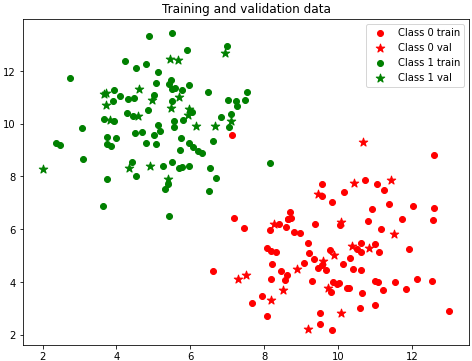

# Câu 2: 2 Điểm 

In [647]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 9]])
y = np.array([0, 0, 0, 1, 1, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = np.fit_transform(x_train)
X_test = np.transform(x_test)

# Tạo mô hình 
model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=42)

# Huấn luyện mô hình
model.fit(X_test, y)

# Dự đoán
y_pred = model.predict(y_test)

# Đánh giá mô hình
accuracy = accuracy_score(X_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%")


AttributeError: module 'numpy' has no attribute 'fit_transform'

### Đoạn code trên đúng hay sai hay bất thường? Nếu sai hoặc bất thường thì sửa lại như thế nào cho đúng ?

In [648]:
# code here
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 9]])
y = np.array([0, 0, 0, 1, 1, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Tạo mô hình 
model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=42)

# # Huấn luyện mô hình
model.fit(X_train, y_train)

# # Dự đoán
y_pred = model.predict(X_test)

# # Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%")


Độ chính xác của mô hình: 40.00%


# Câu 3: 5 Điểm

Điền vào chỗ trống để mô hình MLP bên dưới có thể run chính xác

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Tạo dữ liệu mẫu
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1) #code here # Chuyển y thành vector cột

# One-hot encode nhãn
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit(y)#code here

# Chia dữ liệu thành tập train/test với train =80%
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)#code here

# Chuyển dữ liệu sang tensor (Float32)
X_train = torch.tensor(X_train)#code here
y_train = torch.tensor(y_train)#code here
X_test = torch.tensor(X_test)#code here
y_test = torch.tensor(y_test)#code here

#hyperparameters
input_size = int(500*0.8)#code here
hidden_size = 16
output_size = int(500*0.8) #code here
learning_rate = #code here
epochs = 1000

# Khởi tạo trọng số và bias
W1 = torch.randn(input_size, hidden_size, dtype=torch.float32) * 0.01
b1 = torch.zeros(hidden_size, dtype=torch.float32)
W2 = torch.randn(hidden_size, output_size, dtype=torch.float32) * 0.01
b2 = torch.zeros(output_size, dtype=torch.float32)

# Hàm kích hoạt
def relu(x):
    return #code here

def relu_derivative(x):
    return #code here

def softmax(x):
    #code here
    return exp_x / exp_x.sum(dim=1, keepdim=True)

# Hàm mất mát (Cross-Entropy)
def cross_entropy_loss(y_pred, y_true):
    return #code here

# Huấn luyện
losses = []
for epoch in range(epochs):
    # Forward pass
    z1 = X_train @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_pred = softmax(z2)
    
    # Tính loss
    loss = cross_entropy_loss(y_pred, y_train)
    losses.append(loss.item())
    
    # Backward pass
    dz2 = y_pred - y_train
    dW2 = a1.T @ dz2 / X_train.shape[0]
    db2 = dz2.mean(dim=0)
    
    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = X_train.T @ dz1 / X_train.shape[0]
    db1 = dz1.mean(dim=0)
    
    # Cập nhật trọng số
    W1 -= #code here
    b1 -= #code here
    W2 -= #code here
    b2 -= #code here
    
    # In loss mỗi 100 epochs
    if epoch % 100 == 0:
        #code here

# Đánh giá trên tập test
with torch.no_grad():
    z1 = X_test @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_test_pred = softmax(z2)
    y_test_pred_class = torch.argmax(y_test_pred, axis=1)
    y_test_true_class = torch.argmax(y_test, axis=1)
    accuracy = (y_test_pred_class == y_test_true_class).float().mean()
    print(f"Accuracy on test set: {accuracy.item():.4f}")

# Vẽ biểu đồ loss
#code here


SyntaxError: invalid syntax (3670546447.py, line 10)

Kết quả tham khảo:

Epoch 0, Loss: 0.6930

Epoch 100, Loss: 0.6924

Epoch 200, Loss: 0.6919

Epoch 300, Loss: 0.6911

Epoch 400, Loss: 0.6897

Epoch 500, Loss: 0.6870

Epoch 600, Loss: 0.6821

Epoch 700, Loss: 0.6731

Epoch 800, Loss: 0.6573

Epoch 900, Loss: 0.6314

Accuracy on test set: 0.8400

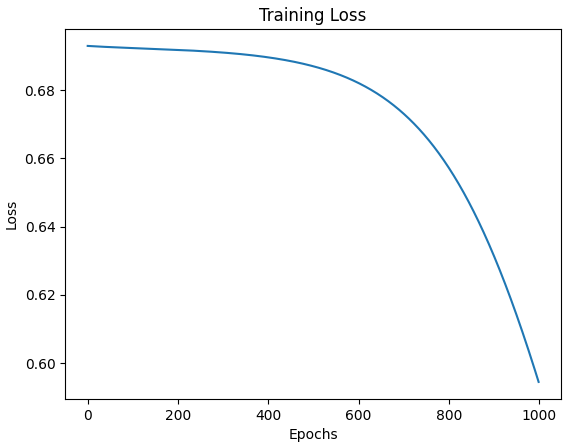

In [ ]:
##--------------Phần này không cần code, chỉ run cho giống đáp án dưới
def plot_decision_boundary(X, y, model):
    # Đảm bảo X và y ở dạng NumPy array
    X = X.numpy() if isinstance(X, torch.Tensor) else X
    y = y.numpy().flatten() if isinstance(y, torch.Tensor) else y.flatten()
    # Tạo lưới điểm để vẽ
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        z1 = grid_tensor @ model["W1"] + model["b1"]
        a1 = relu(z1)
        z2 = a1 @ model["W2"] + model["b2"]
        preds = torch.argmax(softmax(z2), axis=1).numpy()

    # Chuyển về định dạng lưới
    preds = preds.reshape(xx.shape)
    # Vẽ ranh giới
    plt.contourf(xx, yy, preds, alpha=0.6, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Spectral)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()
plot_decision_boundary(X, y, model)

Tham khảo kết quả

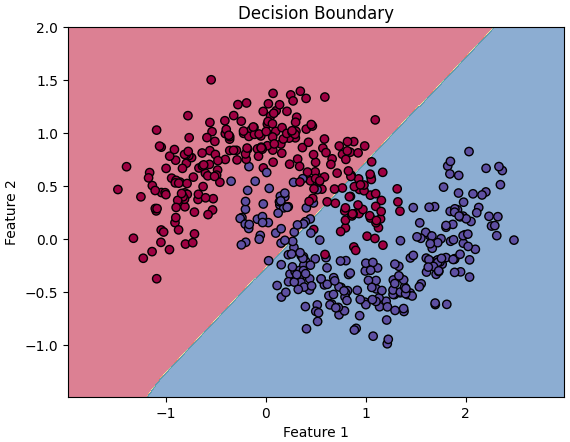